In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("game data.csv")

In [4]:
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Days          8 non-null      int64 
 1   Outlook       8 non-null      object
 2   Temprature    8 non-null      object
 3   Routine       8 non-null      object
 4   Wear Jacket?  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 448.0+ bytes


In [6]:
df.shape

(8, 5)

In [7]:
df=df.drop('Days',axis=1)

In [8]:
df.isnull().sum()

Outlook         0
Temprature      0
Routine         0
Wear Jacket?    0
dtype: int64

In [9]:
df['Outlook'].value_counts()


Outlook
Sunny     4
Cloudy    4
Name: count, dtype: int64

In [10]:
x=df.drop('Wear Jacket?',axis=1)
y=df[['Wear Jacket?']]

In [11]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encoders={}

for col in ['Outlook','Temprature','Routine']:
    le=LabelEncoder()
    x[col]=le.fit_transform(x[col])
    encoders[col]=le

In [14]:
encoders

{'Outlook': LabelEncoder(),
 'Temprature': LabelEncoder(),
 'Routine': LabelEncoder()}

In [15]:
encoders.items()

dict_items([('Outlook', LabelEncoder()), ('Temprature', LabelEncoder()), ('Routine', LabelEncoder())])

In [16]:
le.classes_

array(['Indoor', 'Outdoor'], dtype=object)

In [52]:
for col,le in encoders.items():
    mapping=dict(zip(le.classes_,le.transform(le.classes_)))
    for key,value in mapping.items():
        mapping[key]=int(value)
    print(col,mapping)

Outlook {'Cloudy': 0, 'Sunny': 1}
Temprature {'Cold': 0, 'Warm': 1}
Routine {'Indoor': 0, 'Outdoor': 1}


In [53]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [54]:
x

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


## Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
clf=DecisionTreeClassifier()

In [57]:
clf.fit(x,y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [58]:
clf.predict([[1,0,0]])

array(['No'], dtype=object)

In [59]:
clf.predict([[1,1,0]])

array(['No'], dtype=object)

In [60]:
from sklearn import tree

[Text(0.6666666666666666, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.75, '  False')]

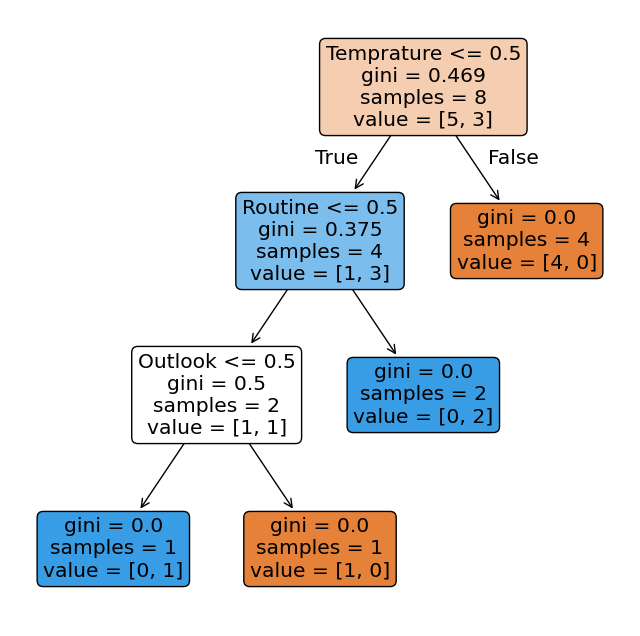

In [61]:
plt.figure(figsize=(8,8))
tree.plot_tree(clf,feature_names=x.columns,rounded=True,filled=True)

## Function

In [65]:
def encoder(out,temp,rout):
    return [
        encoders['Outlook'].transform([out])[0],
        encoders['Temprature'].transform([temp])[0],
        encoders['Routine'].transform([rout])[0]
    ]


In [66]:
encoded=encoder('Sunny','Warm','Outdoor')
encoded

[np.int64(1), np.int64(1), np.int64(1)]

In [64]:
clf.predict([encoded])

array(['No'], dtype=object)